In [26]:
#Imports
!pip install unidecode
from gensim.models import Word2Vec
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize,word_tokenize
import numpy as np
import re
from unidecode import unidecode 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
#Função de pré-processamento das sentenças 
def limpar_texto(raw_text): 
  # Remover acentos e padronizar em lower 
  clean_text = unidecode(raw_text.lower()) 
  # Substituir quebras e tabulações por espaços 
  clean_text = re.sub('[\n\t]', " ", clean_text) 
  # Manter somente caraceteres alfanumericos 
  clean_text = re.sub('[^ a-zA-Z]+', "", clean_text) 
  # Remover stopwords e juntar palavras 
  resultwords = [word for word in clean_text.split() if word not in sw] 
  clean_sw_text = ' '.join(resultwords) 
  return(clean_sw_text)

In [32]:
#Texto usado para a atividade
leminski = "O sentido, acho, é a entidade mais misteriosa do universo.\
            Relação, não coisa, entre a consciência, a vivência e as coisas e os eventos.\
            O sentido dos gestos. O sentido dos produtos. O sentido do ato de existir.\
            Me recuso a viver num mundo sem sentido.\
            Estes anseios/ensaios são incursões em busca do sentido.\
            Por isso o próprio da natureza do sentido: ele não existe nas coisas, tem que ser buscado, numa busca que é sua própria fundação.\
            Só buscar o sentido faz, realmente, sentido.\
            Tirando isso, não tem sentido."

#Tokeniza texto em sentenças
sentencas = sent_tokenize(leminski, language='portuguese')

In [35]:
#Lista de stopwrds da língua portuguesa
sw = nltk.corpus.stopwords.words('portuguese')

# Apresentar frases 
print(sentencas) 

# Aplicar função nas sentenças 
sentencas_limpas = [] 
for frase in sentencas: 
  sentencas_limpas.append(limpar_texto(frase))

# Apresentar frases preprocessadas 
print(sentencas_limpas)

['O sentido, acho, é a entidade mais misteriosa do universo.', 'Relação, não coisa, entre a consciência, a vivência e as coisas e os eventos.', 'O sentido dos gestos.', 'O sentido dos produtos.', 'O sentido do ato de existir.', 'Me recuso a viver num mundo sem sentido.', 'Estes anseios/ensaios são incursões em busca do sentido.', 'Por isso o próprio da natureza do sentido: ele não existe nas coisas, tem que ser buscado, numa busca que é sua própria fundação.', 'Só buscar o sentido faz, realmente, sentido.', 'Tirando isso, não tem sentido.']
['sentido acho entidade misteriosa universo', 'relacao nao coisa consciencia vivencia coisas eventos', 'sentido gestos', 'sentido produtos', 'sentido ato existir', 'recuso viver mundo sentido', 'anseiosensaios sao incursoes busca sentido', 'proprio natureza sentido nao existe coisas buscado busca propria fundacao', 'so buscar sentido faz realmente sentido', 'tirando nao sentido']


In [36]:
#Tokeniza senteças em palavras
tokens = [word_tokenize(palavras) for palavras in sentencas_limpas]

#Cria o modelo
modelo = Word2Vec(tokens,vector_size=5,min_count=1)

#Lista de palavras
palavras_vetor = sorted(list(modelo.wv.index_to_key))
print(palavras_vetor)

X=modelo.wv[palavras_vetor]
print(X)


['acho', 'anseiosensaios', 'ato', 'busca', 'buscado', 'buscar', 'coisa', 'coisas', 'consciencia', 'entidade', 'eventos', 'existe', 'existir', 'faz', 'fundacao', 'gestos', 'incursoes', 'misteriosa', 'mundo', 'nao', 'natureza', 'produtos', 'propria', 'proprio', 'realmente', 'recuso', 'relacao', 'sao', 'sentido', 'so', 'tirando', 'universo', 'vivencia', 'viver']
[[ 0.0114357   0.14883816 -0.01626565 -0.05276828 -0.17506018]
 [-0.1233535   0.02211227  0.12094565 -0.05680101 -0.12347045]
 [-0.01713114  0.05653126  0.10802858  0.14105313 -0.11406243]
 [-0.03617872  0.05751422  0.01989218 -0.16563885 -0.18891922]
 [ 0.05573818  0.13785107  0.12202012  0.19080456  0.18548857]
 [ 0.16763544  0.18021567  0.13073012 -0.01423242  0.1542081 ]
 [-0.00588083 -0.15316056  0.19232649  0.09959135  0.18467636]
 [ 0.14778966 -0.03067471 -0.09066681  0.13102129 -0.09711223]
 [ 0.14622657  0.1014289   0.13517754  0.01526259  0.1270403 ]
 [ 0.10909256  0.16695145 -0.02906181 -0.18421243  0.08742533]
 [-0.038

PCA:
 [[ 0.1647712   0.09251051]
 [ 0.20043354 -0.0426363 ]
 [ 0.05296193 -0.0388675 ]
 [ 0.22553715  0.07000884]
 [-0.14105226 -0.15718128]
 [-0.08387161 -0.15996964]
 [-0.15257627 -0.20380016]
 [-0.11730535  0.1439261 ]
 [-0.09663916 -0.15003523]
 [ 0.02930385  0.01527744]
 [ 0.11465237  0.16310169]
 [-0.13725281  0.01543174]
 [ 0.0231314   0.04981402]
 [ 0.12167346  0.09349246]
 [-0.08572523  0.0349305 ]
 [ 0.21404386 -0.1302319 ]
 [ 0.03338547 -0.12103087]
 [-0.00993595 -0.09023043]
 [ 0.02345898 -0.11825224]
 [ 0.2538314  -0.11951683]
 [-0.10414063 -0.09348255]
 [ 0.16973406 -0.05072905]
 [-0.13545735  0.22624166]
 [-0.00815198 -0.16883136]
 [-0.10421438 -0.10073174]
 [-0.16173619  0.08158976]
 [-0.0012745   0.09210681]
 [-0.16739994  0.12237895]
 [ 0.05043601 -0.00690367]
 [-0.17712384  0.04627867]
 [-0.03554217  0.0666298 ]
 [ 0.09666178  0.11766959]
 [ 0.16470392  0.19331537]
 [-0.21932085  0.12772699]]


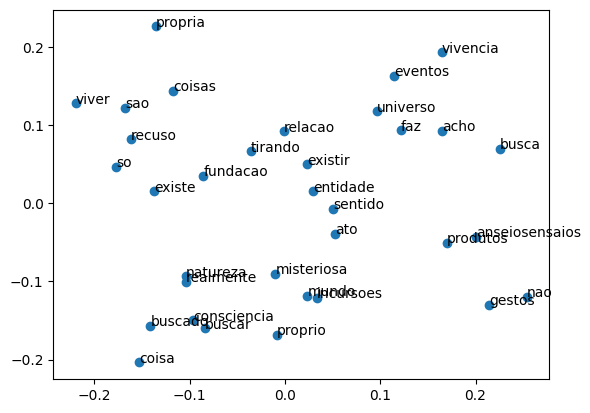

In [37]:
#Aplica o flatten no vetor através do PCA e apresenta graficamente o resultado
pca = PCA(n_components=2) 
resultado = pca.fit_transform(X) 

print('PCA:\n', resultado)

plt.scatter(resultado[:, 0], resultado[:, 1])

for i, palavra in enumerate(palavras_vetor):
   plt.annotate(palavra, xy=(resultado[i, 0], resultado[i, 1]))

plt.show()
